In [ ]:
# Instalar requerimientos del proyecto
%pip install -r requirements.txt 


In [ ]:
import pandas as pd
from pathlib import Path

# Ruta al archivo CSV
# Fuente: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings?select=Tagged-Data-Final.csv
csv_path = Path('data') / 'global_videogames_sales_2023.csv'

# Leer CSV en DataFrame
df = pd.read_csv(csv_path)

# Mostrar información básica
print(f"Filas: {len(df):,}  |  Columnas: {df.shape[1]}")
df.head()


Filas: 6,894  |  Columnas: 18


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T,x,NaN,x
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T,x,NaN,x
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T,x,NaN,x
3,[Prototype],2009.0,Action,Activision,0.84,0.35,0.00,0.12,1.31,78.0,83.0,7.8,356.0,Radical Entertainment,M,NaN,x,x
4,[Prototype],2009.0,Action,Activision,0.65,0.40,0.00,0.19,1.24,79.0,53.0,7.7,308.0,Radical Entertainment,M,NaN,x,x


In [4]:
# Exploración básica del dataset

# 1) Dimensiones: número de filas y columnas del DataFrame
print("Dimensiones (filas, columnas):", df.shape)

# 2) Tipos de datos por columna: ayuda a detectar columnas que deberían ser numéricas o categóricas
print("\nTipos de datos por columna:")
print(df.dtypes)

# 3) Resumen estadístico de columnas numéricas: media, std, min, max, percentiles
print("\nResumen numérico (df.describe()):")
try:
    from IPython.display import display
    display(df.describe().T)
except Exception:
    print(df.describe().T)


Dimensiones (filas, columnas): (6894, 18)

Tipos de datos por columna:
Name                object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
Story Focus         object
Gameplay Focus      object
Series              object
dtype: object

Resumen numérico (df.describe()):


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,6894.0,2007.482303,4.236401,1985.00,2004.00,2007.00,2011.00,2016.00
NA_Sales,6894.0,0.390920,0.963231,0.00,0.06,0.15,0.39,41.36
EU_Sales,6894.0,0.234517,0.684214,0.00,0.02,0.06,0.21,28.96
JP_Sales,6894.0,0.063867,0.286461,0.00,0.00,0.00,0.01,6.50
Other_Sales,6894.0,0.082000,0.268620,0.00,0.01,0.02,0.07,10.57
Global_Sales,6894.0,0.771487,1.954780,0.01,0.11,0.29,0.75,82.53
Critic_Score,6894.0,70.258486,13.861082,13.00,62.00,72.00,80.00,98.00
Critic_Count,6894.0,28.842472,19.194572,3.00,14.00,24.00,39.00,113.00
User_Score,6894.0,7.184378,1.439806,0.50,6.50,7.50,8.20,9.60
User_Count,6894.0,174.392370,584.872155,4.00,11.00,27.00,89.00,10665.00


In [6]:
# 4) Información general: conteo de no nulos, tipo de dato, uso de memoria
print("\nInformación del DataFrame (df.info()):")
df.info()


Información del DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6894 non-null   object 
 1   Year_of_Release  6894 non-null   float64
 2   Genre            6894 non-null   object 
 3   Publisher        6893 non-null   object 
 4   NA_Sales         6894 non-null   float64
 5   EU_Sales         6894 non-null   float64
 6   JP_Sales         6894 non-null   float64
 7   Other_Sales      6894 non-null   float64
 8   Global_Sales     6894 non-null   float64
 9   Critic_Score     6894 non-null   float64
 10  Critic_Count     6894 non-null   float64
 11  User_Score       6894 non-null   float64
 12  User_Count       6894 non-null   float64
 13  Developer        6890 non-null   object 
 14  Rating           6826 non-null   object 
 15  Story Focus      767 non-null    object 
 16  Gameplay Focus   658

In [7]:
# 5) Conteo de valores únicos por columna: útil para entender cardinalidad de variables
print("\nValores únicos por columna (df.nunique()):")
print(df.nunique())


Valores únicos por columna (df.nunique()):
Name               4424
Year_of_Release      25
Genre                12
Publisher           271
NA_Sales            351
EU_Sales            273
JP_Sales            157
Other_Sales         144
Global_Sales        536
Critic_Score         81
Critic_Count        106
User_Score           89
User_Count          881
Developer          1304
Rating                7
Story Focus           1
Gameplay Focus        1
Series                1
dtype: int64


In [9]:
# Detección y tratamiento de duplicados

# 1) Cuantificar duplicados por nombre de juego
print("Duplicados por 'Name':", df['Name'].duplicated().sum())

# 2) Ver ejemplos concretos de duplicados de 'Name'
print("\nEjemplos de nombres duplicados:")
try:
    from IPython.display import display
    mostrar = df[df['Name'].duplicated(keep=False)].sort_values('Name').head(10)
    display(mostrar)
except Exception:
    print(df[df['Name'].duplicated(keep=False)].sort_values('Name').head(10))

Duplicados por 'Name': 2470

Ejemplos de nombres duplicados:


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
11,007: Quantum of Solace,2008.0,Action,Activision,0.01,0.01,0.00,0.00,0.03,70.0,18.0,6.3,55.0,Treyarch,T,NaN,x,NaN
8,007: Quantum of Solace,2008.0,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,NaN,x,NaN
9,007: Quantum of Solace,2008.0,Action,Activision,0.43,0.51,0.02,0.19,1.14,65.0,42.0,6.6,47.0,Treyarch,T,NaN,x,NaN
10,007: Quantum of Solace,2008.0,Action,Activision,0.29,0.28,0.01,0.07,0.65,54.0,11.0,7.5,26.0,Treyarch,T,NaN,x,NaN
20,18 Wheeler: American Pro Trucker,2002.0,Racing,Acclaim Entertainment,0.09,0.02,0.00,0.00,0.11,52.0,17.0,6.8,8.0,Acclaim Studios Cheltenham,E,NaN,x,NaN
19,18 Wheeler: American Pro Trucker,2001.0,Racing,Acclaim Entertainment,0.20,0.15,0.00,0.05,0.40,61.0,11.0,5.7,18.0,Acclaim Studios Cheltenham,E,NaN,x,NaN
18,187: Ride or Die,2005.0,Racing,Ubisoft,0.05,0.01,0.00,0.00,0.06,51.0,40.0,6.9,8.0,Ubisoft Paris,M,NaN,x,NaN
17,187: Ride or Die,2005.0,Racing,Ubisoft,0.07,0.06,0.00,0.02,0.15,52.0,33.0,6.8,12.0,Ubisoft,M,NaN,x,NaN
24,2002 FIFA World Cup,2002.0,Sports,Electronic Arts,0.04,0.01,0.00,0.00,0.05,78.0,9.0,7.7,6.0,EA Sports,E,NaN,x,NaN
23,2002 FIFA World Cup,2002.0,Sports,Electronic Arts,0.14,0.04,0.00,0.01,0.19,79.0,17.0,9.0,4.0,Software Creations,E,NaN,x,NaN


In [10]:
# Conservar, para cada juego duplicado por 'Name', la fila con mayor ventas

import numpy as np

# 1) Identificar columnas de ventas (flexible por nombre)
possible_sales_names = {
    'global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales',
}
sales_cols = [c for c in df.columns if c.lower().endswith('_sales') or c.lower() in possible_sales_names]

if not sales_cols:
    raise ValueError("No se encontraron columnas de ventas (terminadas en '_Sales'). Revisa los nombres de columnas.")

# 2) Asegurar que las columnas de ventas sean numéricas
_df = df.copy()
for c in sales_cols:
    _df[c] = pd.to_numeric(_df[c], errors='coerce')

# 3) Calcular la venta máxima por fila a través de todas las columnas de ventas
_df['_max_sales_across_regions'] = _df[sales_cols].max(axis=1, skipna=True)

# 4) Ordenar por Name y ventas máximas desc, y quedarnos con la primera ocurrencia por Name
_sorted = _df.sort_values(['Name', '_max_sales_across_regions'], ascending=[True, False])
df_max_sales_per_name = _sorted.drop_duplicates(subset=['Name'], keep='first').drop(columns=['_max_sales_across_regions'])

# 5) Reporte
num_original = len(df)
num_result = len(df_max_sales_per_name)
num_duplicated_names = df['Name'].duplicated().sum()

print(f"Columnas de ventas detectadas: {sales_cols}")
print(f"Filas originales: {num_original} | Filas tras quedarnos con mayor venta por 'Name': {num_result}")
print(f"Cantidad de nombres duplicados detectados: {num_duplicated_names}")

try:
    from IPython.display import display
    print("\nVista previa del resultado:")
    display(df_max_sales_per_name.head(10))
except Exception:
    print(df_max_sales_per_name.head(10))


Columnas de ventas detectadas: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
Filas originales: 6894 | Filas tras quedarnos con mayor venta por 'Name': 4424
Cantidad de nombres duplicados detectados: 2470

Vista previa del resultado:


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus,Series
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T,x,NaN,x
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T,x,NaN,x
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T,x,NaN,x
13,007 Racing,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53,51.0,16.0,4.6,14.0,Eutechnyx,T,NaN,x,NaN
8,007: Quantum of Solace,2008.0,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,NaN,x,NaN
12,007: The World is not Enough,2000.0,Action,Electronic Arts,0.51,0.35,0.00,0.06,0.92,61.0,11.0,6.7,44.0,Black Ops Entertainment,T,NaN,x,NaN
21,1 vs. 100,2008.0,Misc,DSI Games,0.08,0.00,0.00,0.01,0.08,38.0,5.0,3.2,5.0,ECI,E,NaN,x,NaN
14,100 Classic Books,2008.0,Misc,Nintendo,0.12,0.52,0.00,0.02,0.66,70.0,7.0,6.0,12.0,Genius Sonority Inc.,NaN,NaN,x,NaN
15,15 Days,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01,63.0,6.0,5.8,8.0,DTP Entertainment,NaN,x,x,NaN
16,1701 A.D.,2006.0,Simulation,Deep Silver,0.00,0.25,0.00,0.04,0.30,79.0,30.0,8.3,38.0,Related Designs,E10+,NaN,x,NaN


In [11]:
# Persistir el resultado: reemplazar df con el máximo de ventas por 'Name'
shape_antes = df.shape

df = df_max_sales_per_name.copy()

shape_despues = df.shape
print(f"Shape antes: {shape_antes} | Shape después: {shape_despues}")


Shape antes: (6894, 18) | Shape después: (4424, 18)


In [13]:
# --- Limpieza e imputación de datos ---

# 1. Revisión de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# 2. Eliminar columnas irrelevantes con muchos nulos (umbral arbitrario: >50% nulos)
umbral_nulos = 0.5
cols_a_eliminar = [col for col in df.columns if df[col].isnull().mean() > umbral_nulos]
if cols_a_eliminar:
    print(f"Se deberían eliminar las columnas con muchos nulos: {cols_a_eliminar}")
    # df = df.drop(columns=cols_a_eliminar)

Valores faltantes por columna:
Name                  0
Year_of_Release       0
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             2
Rating               54
Story Focus        3901
Gameplay Focus      247
Series             3956
dtype: int64
Se deberían eliminar las columnas con muchos nulos: ['Story Focus', 'Series']


In [14]:
# Eliminar la columna 'Series'
if 'Series' in df.columns:
    df = df.drop(columns=['Series'])

# Convertir 'Story Focus' y 'Gameplay Focus' a booleanos (bit: True si 'x', False si vacío o NaN)
for col in ['Story Focus', 'Gameplay Focus']:
    if col in df.columns:
        df[col] = df[col].fillna('').apply(lambda x: True if str(x).strip().lower() == 'x' else False)

# Mostrar un head para ver las columnas nuevas
print("Vista previa tras conversión de 'Story Focus' y 'Gameplay Focus' a booleanos y eliminación de 'Series':")
display(df.head())



Vista previa tras conversión de 'Story Focus' y 'Gameplay Focus' a booleanos y eliminación de 'Series':


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Story Focus,Gameplay Focus
0,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,60.0,CyberConnect2,T,True,False
1,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.9,81.0,CyberConnect2,T,True,False
2,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.7,19.0,CyberConnect2,T,True,False
13,007 Racing,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53,51.0,16.0,4.6,14.0,Eutechnyx,T,False,True
8,007: Quantum of Solace,2008.0,Action,Activision,0.82,0.51,0.01,0.14,1.48,65.0,69.0,7.1,71.0,Treyarch,T,False,True


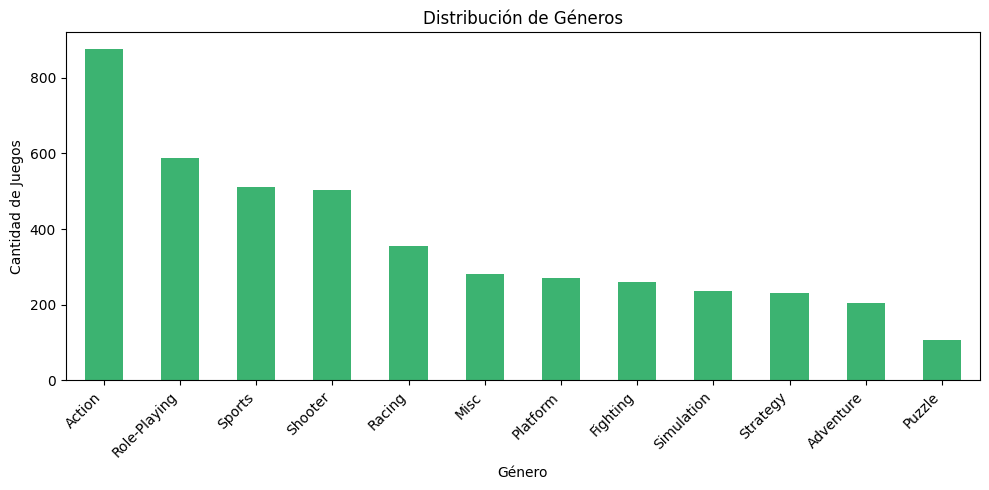

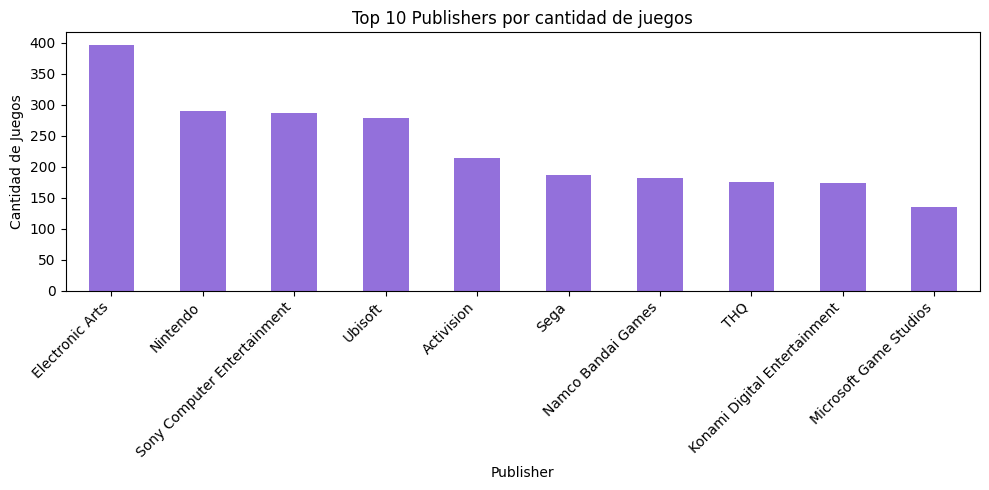

<Figure size 1200x600 with 0 Axes>

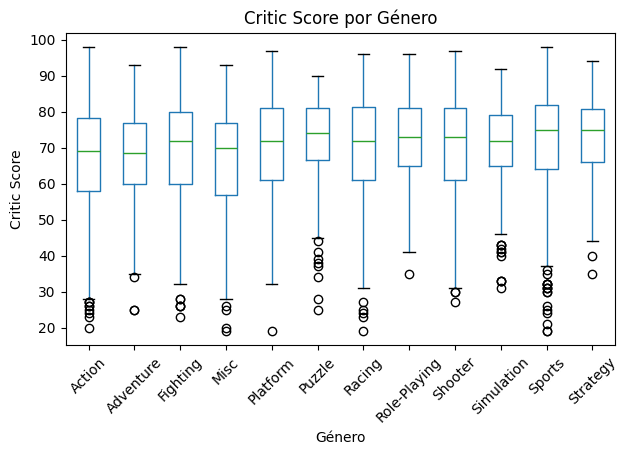

<Figure size 1200x600 with 0 Axes>

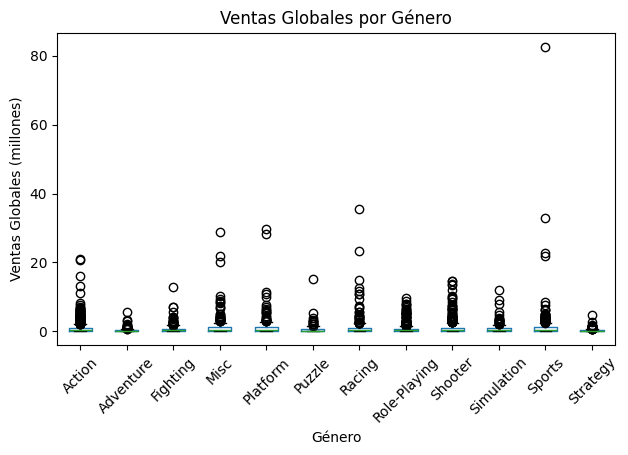

In [16]:
import matplotlib.pyplot as plt

# Barras: distribución de géneros
plt.figure(figsize=(10,5))
df['Genre'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Barras: distribución de publishers (top 10)
plt.figure(figsize=(10,5))
df['Publisher'].value_counts().head(10).plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Publishers por cantidad de juegos')
plt.xlabel('Publisher')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot: comparar Critic_Score por género
if 'Critic_Score' in df.columns:
    plt.figure(figsize=(12,6))
    df.boxplot(column='Critic_Score', by='Genre', grid=False, rot=45)
    plt.title('Critic Score por Género')
    plt.suptitle('')
    plt.xlabel('Género')
    plt.ylabel('Critic Score')
    plt.tight_layout()
    plt.show()

# Boxplot: comparar Global_Sales por género
plt.figure(figsize=(12,6))
df.boxplot(column='Global_Sales', by='Genre', grid=False, rot=45)
plt.title('Ventas Globales por Género')
plt.suptitle('')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (millones)')
plt.tight_layout()
plt.show()
